Phase 2: Preprocessing the Cleaned Data

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("G:\ML\Digital_Detox_Predictor\Data\Cleaned_Dataset.csv")

In [9]:
data.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [10]:
X = data.drop(["Addicted_Score"],axis = 1)
y = data["Addicted_Score"]

In [11]:
categorical_cols = [
    'Gender',
    'Academic_Level', 
    'Most_Used_Platform',
    'Affects_Academic_Performance',
    'Relationship_Status'
    ]


numeric_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media'
]

In [12]:
X = pd.get_dummies(X, columns = categorical_cols, drop_first = True,dtype = int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [14]:
scaler = StandardScaler()

In [15]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [16]:
print("--- REFINERY REPORT ---")
print(f"Training Data Shape: {X_train.shape} (Rows, Columns)")
print(f"Testing Data Shape: {X_test.shape} (Rows, Columns)")
print("\n[SUCCESS] Data is ready for the engine.")

--- REFINERY REPORT ---
Training Data Shape: (564, 22) (Rows, Columns)
Testing Data Shape: (141, 22) (Rows, Columns)

[SUCCESS] Data is ready for the engine.


In [17]:
X_train.head()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Gender_Male,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,...,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Affects_Academic_Performance_Yes,Relationship_Status_In Relationship,Relationship_Status_Single
24,0.959149,-1.353023,0.030589,0.700311,-0.900107,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,-0.481490,-0.574265,0.466244,-1.107356,1.197663,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
210,-0.481490,1.061127,-2.147688,-0.203523,1.197663,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
260,-1.201810,1.294754,-1.102115,-2.011190,1.197663,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
424,-1.201810,-1.586651,1.773210,1.604144,-0.900107,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


Phase 3: Training the model using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [23]:
print("---- Metrics ----")
print(f"mean_squared_error:{rmse: .2f}")
print(f"mean_absolute_error:{mae: .2f}")
print(f"r2_score:{r2: .2f}")

---- Metrics ----
mean_squared_error: 0.29
mean_absolute_error: 0.22
r2_score: 0.97


In [24]:
# ---------------------------------------------------------
# INVESTIGATION: FINDING THE LEAK
# Goal: See which feature has a suspiciously high weight.
# ---------------------------------------------------------

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_
})

# Sort by absolute value to see the biggest drivers
coef_df['Abs_Weight'] = coef_df['Weight'].abs()
print(coef_df.sort_values(by='Abs_Weight', ascending=False).head(5))

                             Feature    Weight  Abs_Weight
10           Most_Used_Platform_LINE -0.879753    0.879753
9       Most_Used_Platform_KakaoTalk -0.853361    0.853361
19  Affects_Academic_Performance_Yes  0.768158    0.768158
3                Mental_Health_Score -0.623382    0.623382
18        Most_Used_Platform_YouTube  0.512124    0.512124


Now let's train the model using Decision Tree Regressor Algorithm. Note that in general, tree algorithms doesn't need to be scaled

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree_model = DecisionTreeRegressor(random_state = 42, max_depth = 5)

In [27]:
tree_model.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [28]:
y_pred_tree = tree_model.predict(X_test)

In [29]:
r2_dt = r2_score(y_test, y_pred_tree)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print("--- METRICS FROM DECISION TREE ---")
print(f"R² Score: {r2_dt:.4f}")
print(f"RMSE: {rmse_dt:.2f}")

--- METRICS FROM DECISION TREE ---
R² Score: 0.9664
RMSE: 0.29


Now let's use our last model i.e. Random Forest Regressor because Decision Trees are unstable when the training data gets changed so we use RF algorithm to average out the variance

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [32]:
rf_model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [33]:
rf_pred = rf_model.predict(X_test)

In [34]:
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

print("--- METRICS FROM RANDOM FOREST ---")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.2f}")

--- METRICS FROM RANDOM FOREST ---
R² Score: 0.9799
RMSE: 0.22


In [35]:
model_performance = {
    "Linear Regression": 0.9700,
    "Decision Tree": 0.9664,
    "Random Forest": 0.9799
}

Phase 5: Getting Insights from the model and saving the champion model for the website

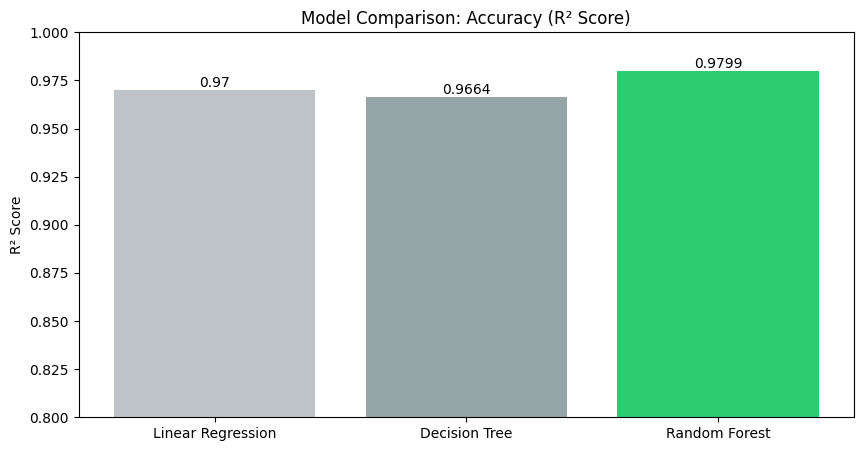

--- SAVING THE CHAMPION ---
[SUCCESS] Model and Scaler saved to disk.


In [36]:
import matplotlib.pyplot as plt
import joblib

models = list(model_performance.keys())
scores = list(model_performance.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(models, scores, color=['#bdc3c7', '#95a5a6', '#2ecc71']) # Green for winner

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.ylim(0.8, 1.0) 
plt.title('Model Comparison: Accuracy (R² Score)')
plt.ylabel('R² Score')
plt.show()

#The Export (Saving the Champion)
print("--- SAVING THE CHAMPION ---")
joblib.dump(rf_model, 'addiction_predictor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("[SUCCESS] Model and Scaler saved to disk.")